<a href="https://colab.research.google.com/github/Rakin003/Rakin_Code_Workshop/blob/main/Efficiaentnet50_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving a0067c83-34a6-4e23-a3ce-d4e8fb5da4d8.jpg to a0067c83-34a6-4e23-a3ce-d4e8fb5da4d8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


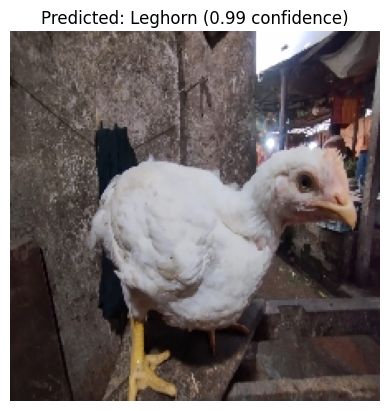

Predicted class: Leghorn
Confidence: 0.9895


In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Load your EfficientNet model
model = load_model('/content/drive/MyDrive/chicken_dataset/chicken_efficientnetb0_model.h5')

# Define class labels in order (same as during training)
class_labels = ['Bielefelder', 'Blackorpington', 'Brahma', 'Buckeye', 'Fayoumi',
                'Leghorn', 'NewHampshire', 'PlymouthRock', 'Sussex', 'Turken']

# Upload image manually in Colab
from google.colab import files
uploaded = files.upload()

# Get the image filename
img_path = list(uploaded.keys())[0]

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict
pred_probs = model.predict(img_array)
pred_index = np.argmax(pred_probs[0])
pred_label = class_labels[pred_index]
confidence = np.max(pred_probs[0])

# Show results
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {pred_label} ({confidence:.2f} confidence)")
plt.show()

# Print raw prediction
print(f"Predicted class: {pred_label}")
print(f"Confidence: {confidence:.4f}")
